https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
with open("heart.doc") as file:
    print(file.read().strip())

This database contains 13 attributes (which have been extracted from
a larger set of 75)       
  


Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

Attributes types
-----------------

Real: 1,4,5,8,10,12
Ordered:11,
Binary: 2,6,9
Nominal:7,3,13

Variable to be predicted
------------------------
Absence (1) or presence (2) of heart dise

In [3]:
df = pd.read_csv('heart.dat',header=None, sep='\s', engine='python')
column_names = ["age",
                'sex', 'chest pain type','resting blood pressure',
                'serum cholestoral','fasting blood sugar > 120 mg/dl', 
                'resting electrocardiographic results',
                'maximum heart rate','exercise induced angina', 
                'oldpeak', 'the slope of the peak exercise ST segment',
                'number of major vessels (0-3) colored by flourosopy','thal','target']
df.columns = column_names
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
#checking if there's any missing value
df.isna().any().any()

False

In [5]:
#checking datatypes
df.dtypes

age                                                    float64
sex                                                    float64
chest pain type                                        float64
resting blood pressure                                 float64
serum cholestoral                                      float64
fasting blood sugar > 120 mg/dl                        float64
resting electrocardiographic results                   float64
maximum heart rate                                     float64
exercise induced angina                                float64
oldpeak                                                float64
the slope of the peak exercise ST segment              float64
number of major vessels (0-3) colored by flourosopy    float64
thal                                                   float64
target                                                   int64
dtype: object

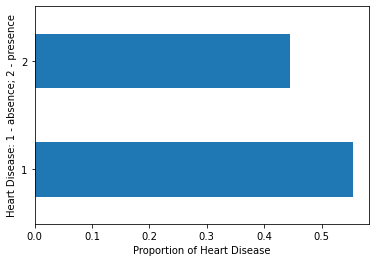

In [6]:
#visualising target results
df['target'].value_counts().div(df.shape[0]).plot.barh()
plt.ylabel('Heart Disease: 1 - absence; 2 - presence')
plt.xlabel('Proportion of Heart Disease');

### Prototyping a features against target

In [7]:
counts = df[['sex','target']].groupby(['sex','target']).size().unstack('target')
counts

target,1,2
sex,,
0.0,67,20
1.0,83,100


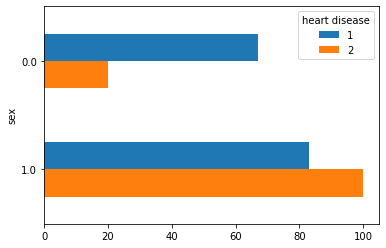

In [8]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(title='heart disease');

In [9]:
sex_counts = counts.sum(axis = 1)
sex_counts

sex
0.0     87
1.0    183
dtype: int64

In [10]:
props = counts.div(sex_counts, axis = 0)
props 

target,1,2
sex,,
0.0,0.770115,0.229885
1.0,0.453552,0.546448


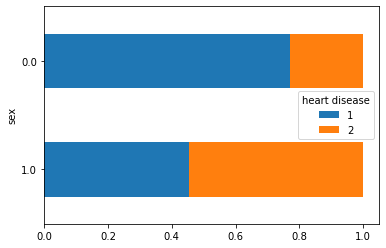

In [11]:
ax = props.plot.barh(stacked= True)
ax.invert_yaxis()
ax.legend(title='heart disease');

### Drawing all features against target

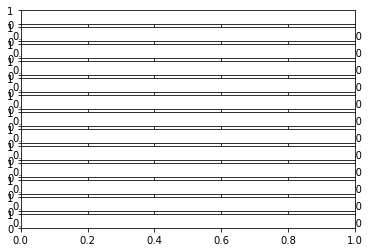

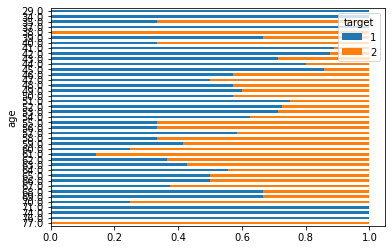

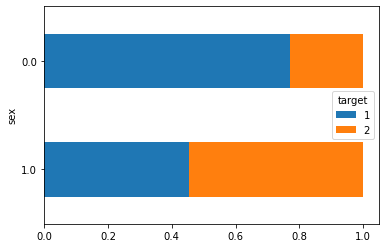

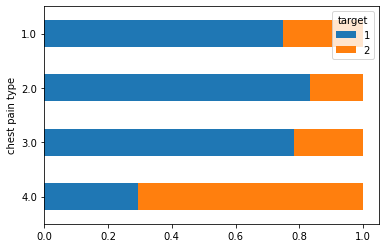

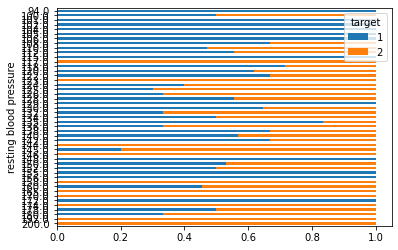

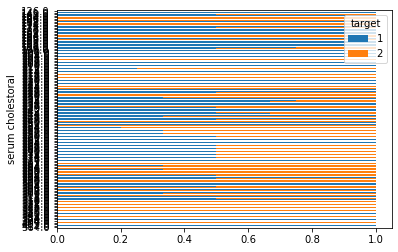

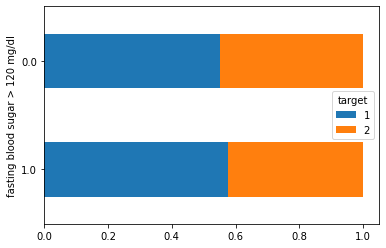

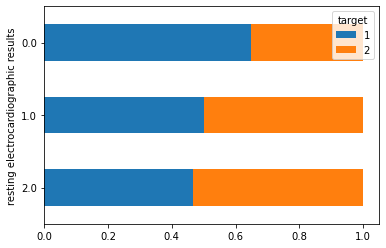

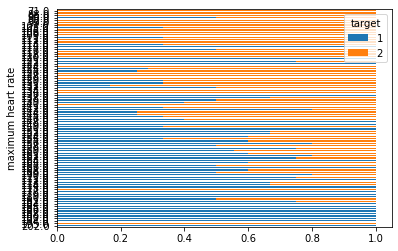

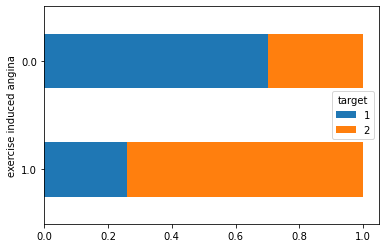

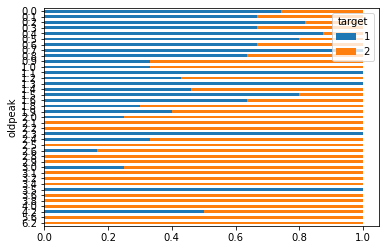

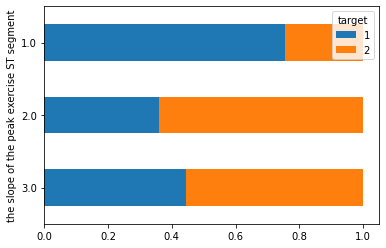

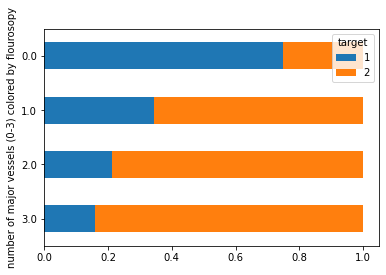

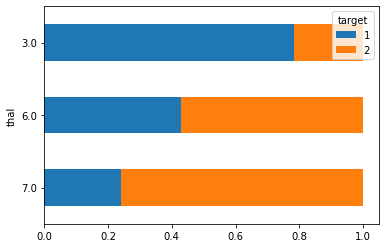

In [12]:
def graphing():
    fig, ax = plt.subplots(13)
    
    for i,feature in enumerate(df.columns[:-1]):
        counts = df[[feature,'target']].groupby([feature,'target']).size().unstack('target')
        i_counts = counts.sum(axis = 1)
        i_props = counts.div(i_counts, axis = 0)
        ax[i] = i_props.plot.barh(stacked= True)
        ax[i].invert_yaxis()
        ax[i].set_ylabel(feature)
        

    pass

graphing()

### Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer

RANDOM_SEED = 0

#### Columntransformer?

In [14]:
#steps = Pipeline([('Stanadard scaler', StandardScaler())])
#preprocessor = ColumnTransformer(transformer = [("standard scaler", StandardScaler())],remainder = "drop")
estimator=LogisticRegression(penalty="l2", C=1)

pipeline = Pipeline([("standard scaler", StandardScaler()),("estimator", estimator)])
pipeline

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('estimator', LogisticRegression(C=1))])

In [24]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify = y,
    random_state=RANDOM_SEED
)

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('estimator', LogisticRegression(C=1))])

In [28]:
y_pred = pipeline.predict(X_test)

In [29]:
roc_auc_score(y_test, y_pred)

0.7825

### Plotting roc score

In [34]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label = 2)
    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1], linestyle = '--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}:AUC = {roc_auc_score(y_true, y_score):.4f}")
                 


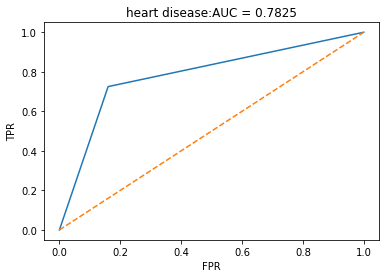

In [39]:
fig, ax = plt.subplots(1,1)

plot_roc(y_test, y_pred, 'heart disease', ax = ax);


# Next : do a grid search 